# PART-1 : TENSORFLOW Excercise

## Use the provided datafile and complete the following steps. Complete the assignment within a .ipynb notebook. Submit either the .ipynb, .html, or .pdf of the results.


## Step 1. Import the data from the given .csv file (diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv", header=None)
df.head()

0         1         2         3         4         5         6  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

          7  8  
0 -0.033333  0  
1 -0.666667  1  
2 -0.633333  0  
3  0.000000  1  
4 -0.600000  0

In [3]:
'''
    As the feature names are not given, assuming the values
'''
column_names = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8',
               'label']  

df.columns = column_names
df.head()

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

   feature8  label  
0 -0.033333      0  
1 -0.666667      1  
2 -0.633333      0  
3  0.000000      1  
4 -0.600000      0

In [4]:
df.describe()

feature1    feature2    feature3    feature4    feature5    feature6  \
count  759.000000  759.000000  759.000000  759.000000  759.000000  759.000000   
mean    -0.407657    0.218563    0.176505   -0.289735   -0.323534   -0.032245   
std      0.386260    0.306419    0.201287    0.258480    0.375544    0.205376   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.178837   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         feature7    feature8       label  
count  759.000000  759.000000  759.000000  
mean    -0.663253   -0.516162    0.653491  
std      0.283056    0.400794    0.476171  
min     -0.994876   -0.966667    0.000000  
25%     -0.858241   -0.866667    0.000000  
50%     -0.747225   -0.633333    1.000000  
75%     -0.531597   -0.233333    1.000000  
max      1.000000    1.000000    1.000000

## Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

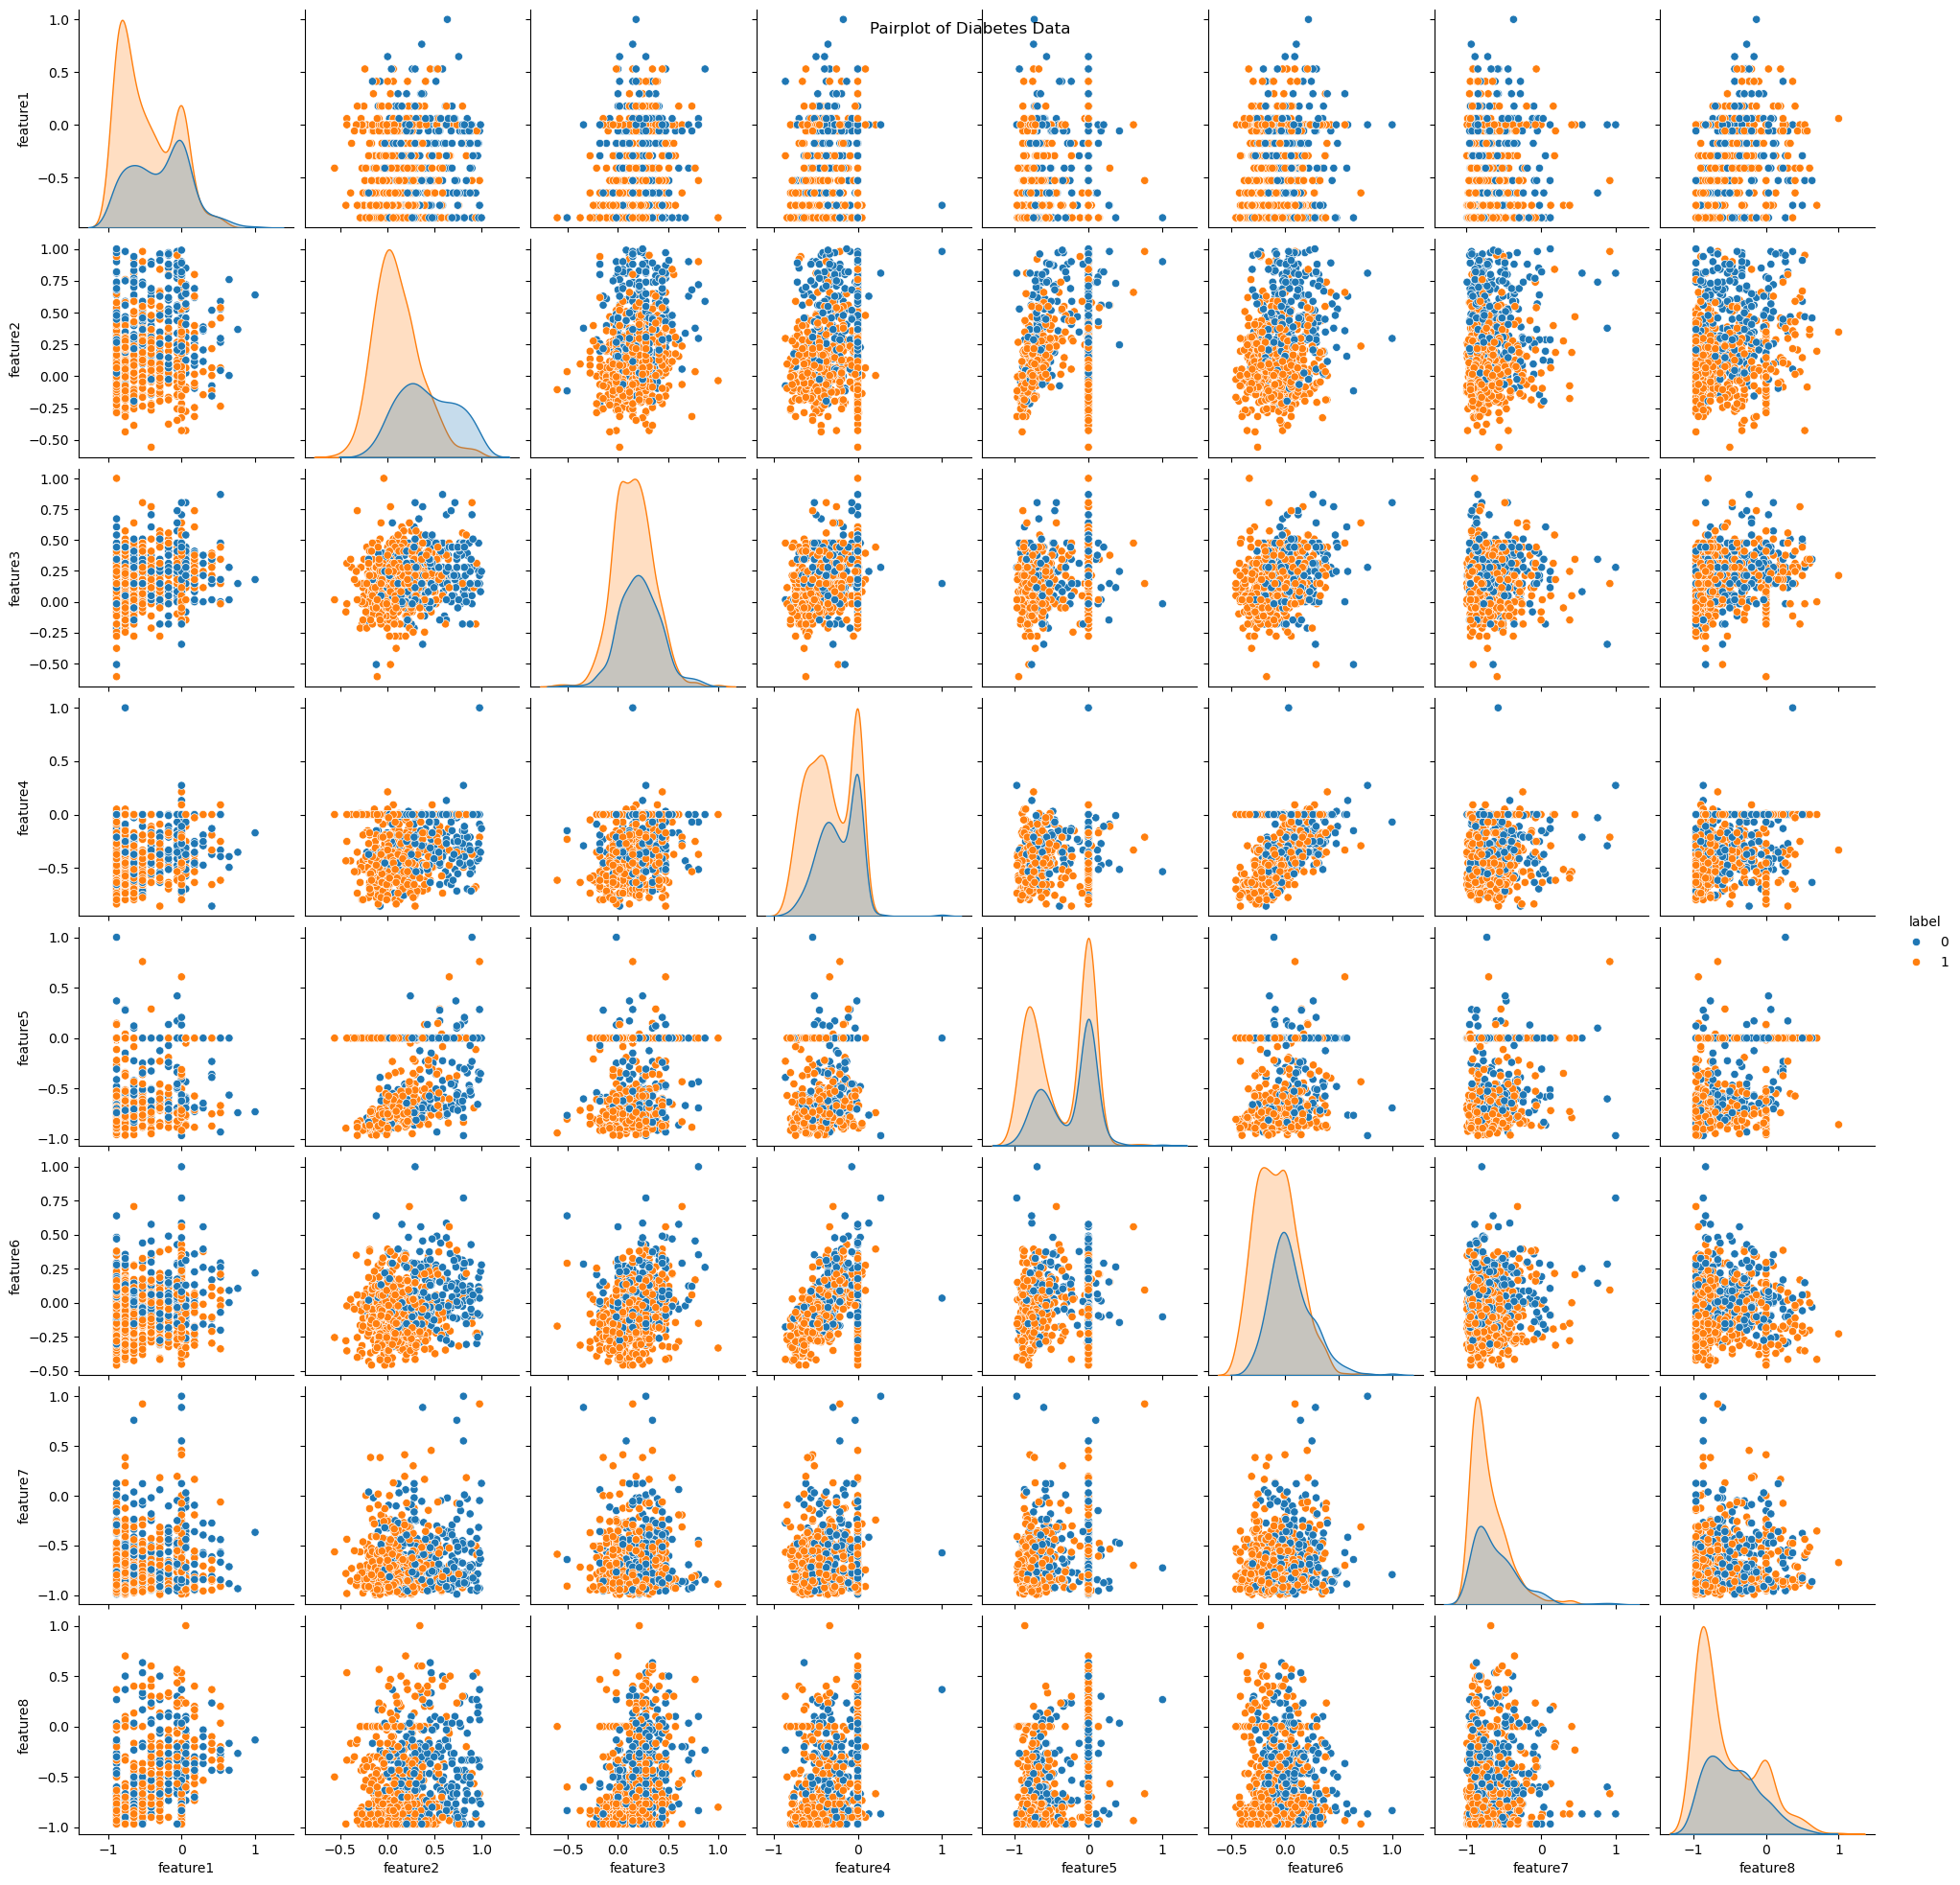

In [5]:
"""
    This plot provides scatter plot between each variable.
    It also highlights the both label values in the data, where 
        Red color - represents class 0
        Blue color - represents class 1
        
    It shows for some features clear distinction like feature1 have totally differnt distribution for label 0/1
    it also shows feautre3 have the same distribution for both classes.
"""
sns.pairplot(df,  hue="label", diag_kind="kde")
plt.suptitle("Pairplot of Diabetes Data")
plt.show()

Blue Color represnet "Class-0" and Orange represents "Class-1"


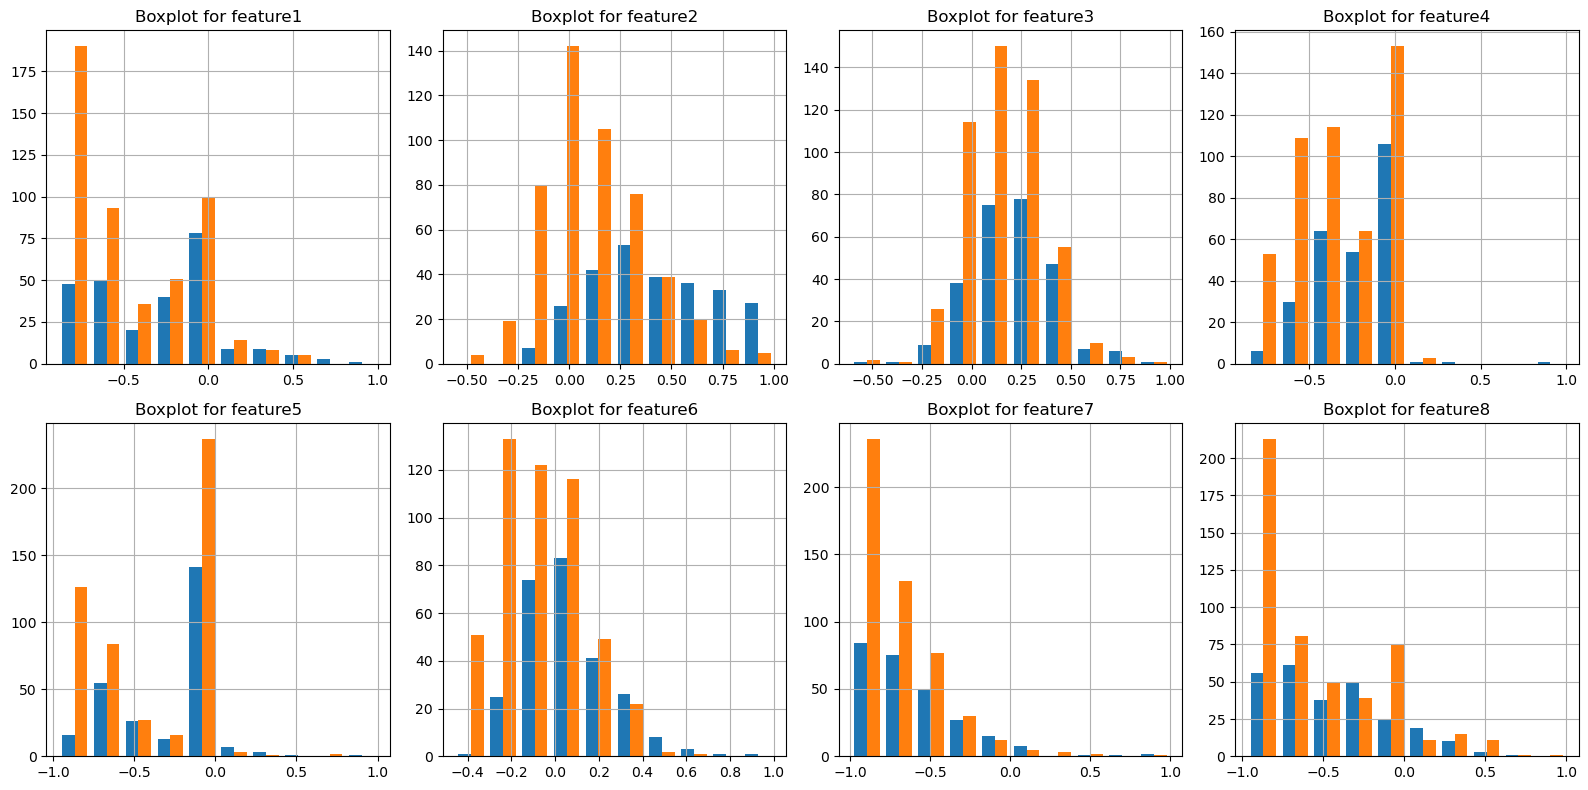

In [6]:
"""
    This is a histogram plot for all the features for both classes.
"""
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
%matplotlib inline

print("Blue Color represnet \"Class-0\" and Orange represents \"Class-1\"")

for i, ax in enumerate(axs.flatten()):
    col_name = df.columns[i]  # Extract the feature name
    class_data = [df[df['label'] == 0][col_name], 
                  df[df['label'] == 1][col_name]]
    ax.hist(class_data)
    ax.set_title(f'Boxplot for {col_name}')
    ax.grid(True)

plt.tight_layout()
plt.show()

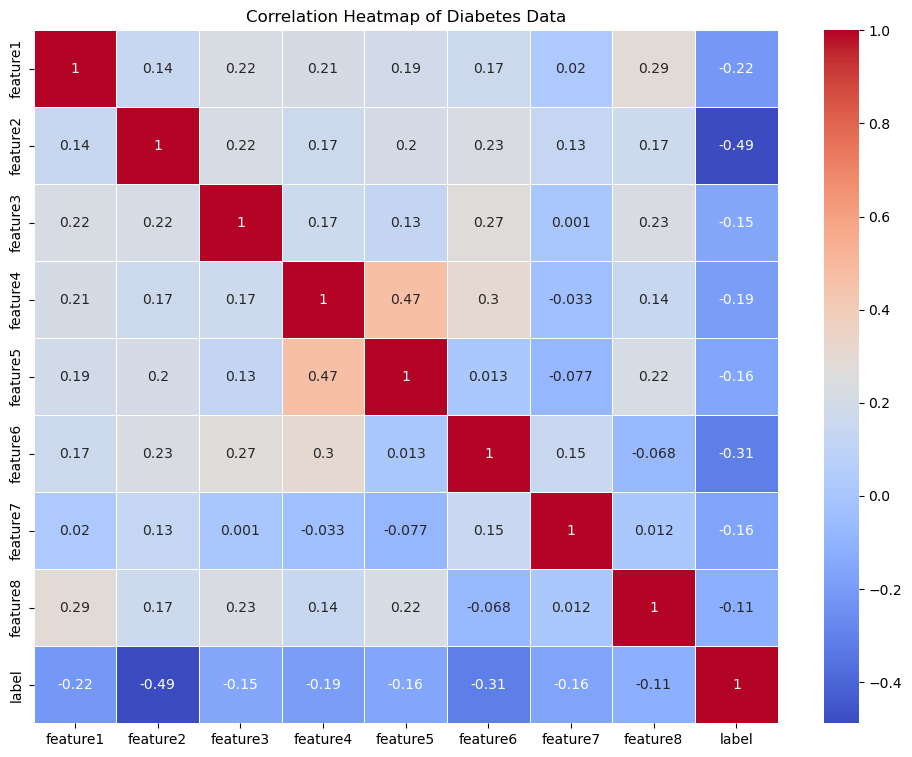

In [7]:
# Correlation Heatmap between all the features and label.
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Diabetes Data")
plt.show()

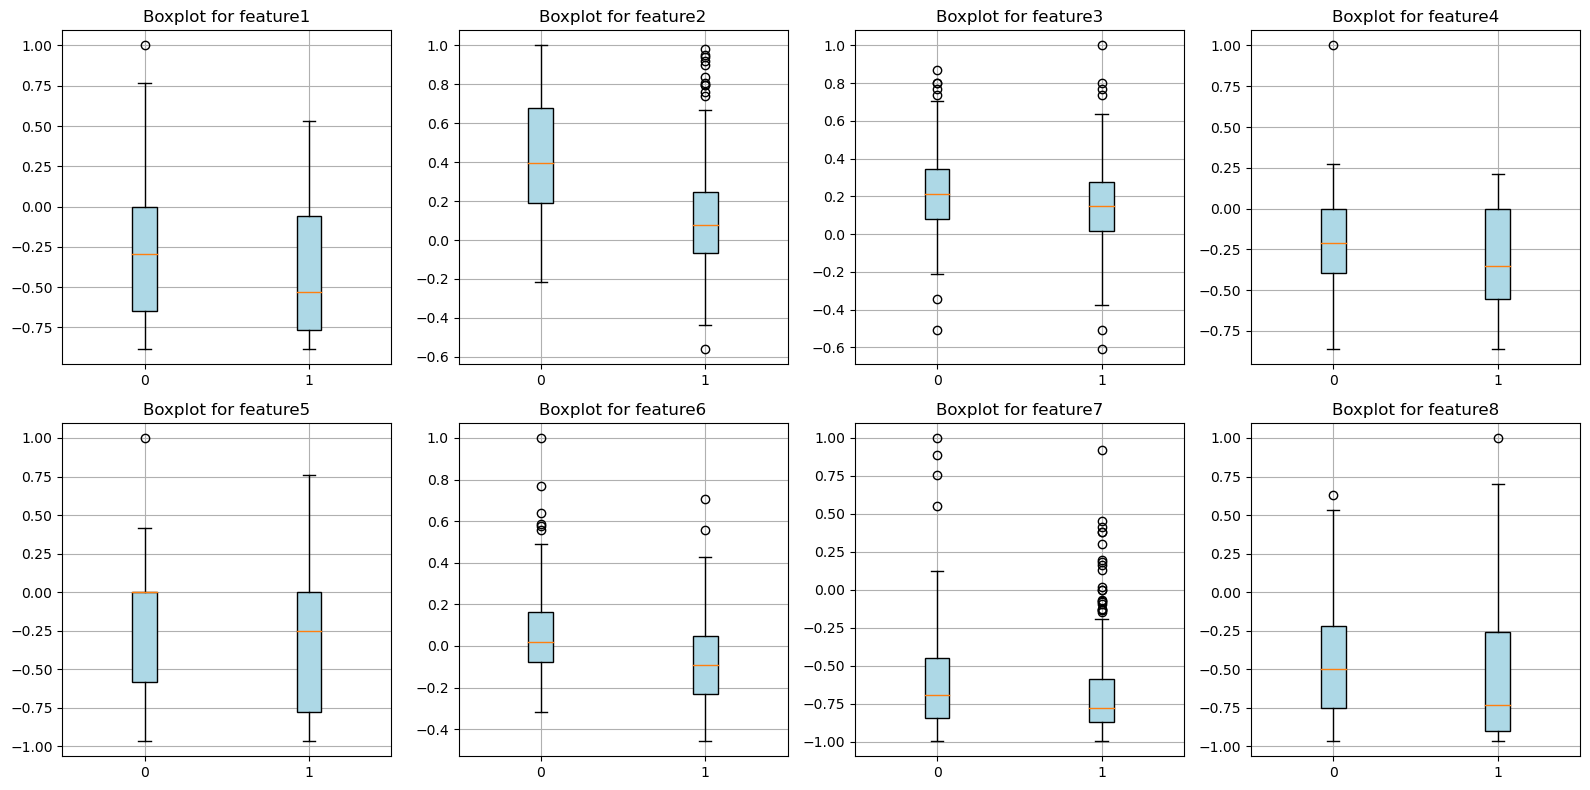

In [8]:
"""
    Creating the Box plots for each features to identify the anamolies for each features for each of the output
    class.
    
    Some of the observations care cleat the for feature2 and feature7 there are a lots of outlier values for 
    class-1, and feature3 and feature6 vice-versa.
"""

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axs.flatten()):
    col_name = df.columns[i]  # Extract the feature name
    class_data = [df[df['label'] == 0][col_name], df[df['label'] == 1][col_name]]
    
    bp = ax.boxplot(class_data, labels=["0", "1"], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    ax.set_title(f'Boxplot for {col_name}')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Step 3. Split into 80% train 20% test


In [9]:
from sklearn.model_selection import train_test_split

def split_data(df, standardize=False):
    """
        This method will divide the data in train and test.
        If standardize = True, then it will standardize the data also for which default value is set as False.
    """
    X = df.drop('label', axis=1).values  # Features
    y = df['label'].values               # Label

    # Split the dataset into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

    # Standardize the dataset
    if standardize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    print(f'Train Data size = {X_train.shape}')
    print(f'Test  Data size = {X_test.shape}')
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data(df)

Train Data size = (607, 8)
Test  Data size = (152, 8)


## Step 4. Modify the model shown in the demo to take the new data

In [10]:
def build_single_layer_neural_network_tf(n):
    """
        This is a sample neural netowrk using tensorflow. It have 3 layers
    """
    hidden_features = n//2
    return tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                tf.keras.layers.Dense(hidden_features, activation='relu'),
                                tf.keras.layers.Dense(1, activation='relu')
                               ])

##  Step 5. Train the model on the data

In [11]:
import matplotlib.pyplot as plt
 
def plot_training_metrics(losses, accuracies):
    """
        This method will plot the traing metrics
    """
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    # Plot the data in each subplot
    axs[0].plot(losses)
    axs[0].set_title('Traing Loss vs Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Training Loss')
    axs[0].grid(True)

    axs[1].plot(accuracies)
    axs[1].set_title('Training Accuracy vs Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Training Accuracy')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


In [12]:
def train_tensorflow(X_train, y_train, nn_model, loss, optimizer, metrics, epochs, batch_size, verbose=0, plots=False):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like - 
        loss = loss function
        optmizer =  'adam' or 'SGD'
        metrics = which used to evaluate the model
        epocs  = number of iteration the moedls will be trained
        batch_size = how much input will be given to the training algorithm
    """
    nn_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    losses = history.history['loss']
    accuracies = history.history['accuracy']
    
    if plots:
        plot_training_metrics(losses, accuracies)
        
    
    return nn_model, losses, accuracies

Epoch 1/20
19/19 [==============================] - 0s 597us/step - loss: 1.1164 - accuracy: 0.4415
Epoch 2/20
19/19 [==============================] - 0s 536us/step - loss: 0.6894 - accuracy: 0.6474
Epoch 3/20
19/19 [==============================] - 0s 561us/step - loss: 0.6722 - accuracy: 0.6507
Epoch 4/20
19/19 [==============================] - 0s 530us/step - loss: 0.6623 - accuracy: 0.6507
Epoch 5/20
19/19 [==============================] - 0s 512us/step - loss: 0.6546 - accuracy: 0.6540
Epoch 6/20
19/19 [==============================] - 0s 458us/step - loss: 0.6521 - accuracy: 0.6557
Epoch 7/20
19/19 [==============================] - 0s 511us/step - loss: 0.6484 - accuracy: 0.6590
Epoch 8/20
19/19 [==============================] - 0s 493us/step - loss: 0.6462 - accuracy: 0.6639
Epoch 9/20
19/19 [==============================] - 0s 482us/step - loss: 0.6440 - accuracy: 0.6606
Epoch 10/20
19/19 [==============================] - 0s 509us/step - loss: 0.6427 - accuracy: 0.6672

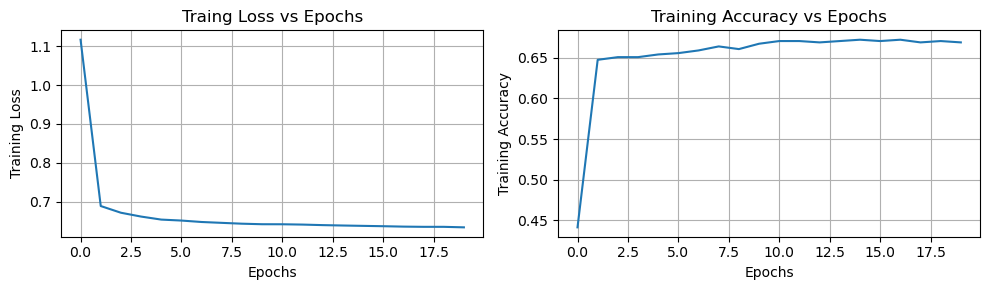

In [24]:
single_layer_neural_network_tf = build_single_layer_neural_network_tf(X_train.shape[1])
single_layer_neural_network_tf, _, _ = train_tensorflow(X_train, 
                                                       y_train, 
                                                       single_layer_neural_network_tf, 
                                                       loss = tf.keras.losses.BinaryCrossentropy(),
                                                       optimizer = 'sgd',
                                                       metrics = ['accuracy'],
                                                       epochs=20,
                                                       batch_size=32,
                                                       verbose=1,
                                                        plots=True
                                                  )
single_layer_neural_network_tf

##  Step 6. Make predictions on the test data and compare them to the test labels

In [14]:
def predict_tf(model, X, verbose=1):
    y_prob = model.predict(X, verbose=0)
    predictions = np.array([1 if pred >= 0.5 else 0 for pred in y_prob])
    
    if verbose != 0:
        print("raw scores = ", y_prob.squeeze()[:5])
        print("predictions = ", predictions.squeeze()[:5])
        
    return predictions

In [15]:
y_pred = predict_tf(single_layer_neural_network_tf, X_test, verbose=1)

raw scores =  [0.528246   0.5340426  0.4277842  0.5941512  0.98511386]
predictions =  [1 1 0 1 1]


## Step 7. Calculate the accuracy of your results

In [16]:
def calculate_accuracy_tf(y_test, y_pred):
    # Calculate accuracy
    correct_predictions = (y_pred == y_test).sum()
    total_samples = y_test.shape[0]
    accuracy = correct_predictions / total_samples * 100
    return accuracy

In [17]:
accuracy = calculate_accuracy_tf(y_test, y_pred)
print(f"{accuracy = }")

accuracy = 73.68421052631578


## Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

In [18]:
def load_different_tensorflow_model(n):
    """
        Creating Differnet Neural Network with different layers and activation function.
        Some neural networks are wider and some are deeper.
        
        Made Neural Networks Deep or Wide or Deep and Wide both. 
        Tried experimeting with different optimizers also.
                
        Programmatically it was getting complex, so defining all of them and later execute them with differnet 
        hyper parameters
    """

    # 3 layer network with 1 hidden layer and having the n/2 = 4 hidden feature, and Relu activation function
    hidden_features = n//2
    model1 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                tf.keras.layers.Dense(hidden_features, activation='relu'),
                                tf.keras.layers.Dense(1, activation='relu')
                               ])

    # 3 layer network with 1 hidden layer and having the n/2 = 4 hidden feature, and Sigmoid as activation function    
    hidden_features = n//2
    model2 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='sigmoid',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='sigmoid'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])

    # 3 layer network with 1 hidden layer and having the n*2 = 16 hidden feature, and Relu as activation function
    hidden_features = n*2
    model3 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='relu')
                                 ])

    # 3 layer network with 1 hidden layer and having the n*2 = 16 hidden feature, and Sigmoid as activation function
    hidden_features = n*2
    model4 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='sigmoid',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='sigmoid'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])

    # 5 layer network with 1 hidden layer and having the n*4 = 16 hidden feature, and Relu as activation function
    hidden_features = n*4
    model5 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='relu',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='relu'),
                                  tf.keras.layers.Dense(hidden_features//2, activation='relu'),
                                  tf.keras.layers.Dense(hidden_features//4, activation='relu'),
                                  tf.keras.layers.Dense(1, activation='relu')
                                 ])
    
    # 5 layer network with 1 hidden layer and having the n*4 = 16 hidden feature, and Sigmoid as activation function
    hidden_features = n*4
    model6 = tf.keras.Sequential([tf.keras.layers.Dense(hidden_features, activation='sigmoid',input_shape=(n,)),
                                  tf.keras.layers.Dense(hidden_features, activation='sigmoid'),
                                  tf.keras.layers.Dense(hidden_features//2, activation='sigmoid'),
                                  tf.keras.layers.Dense(hidden_features//4, activation='sigmoid'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                 ])

    models = [model1, model2, model3, model4, model5, model6]
    
    names = ["3-Layer-narrow_Relu", "3-Layer-narrow_Sigmoid", 
             "3-Layer-wide_Relu", "3-Layer-wide_Sigmoid",
             "5-layer-wide-deep_Relu", "5-layer-wide-deep_Sigmoid"
            ]
    return models, names

## Step 9. Test your hypothesis by training your new models

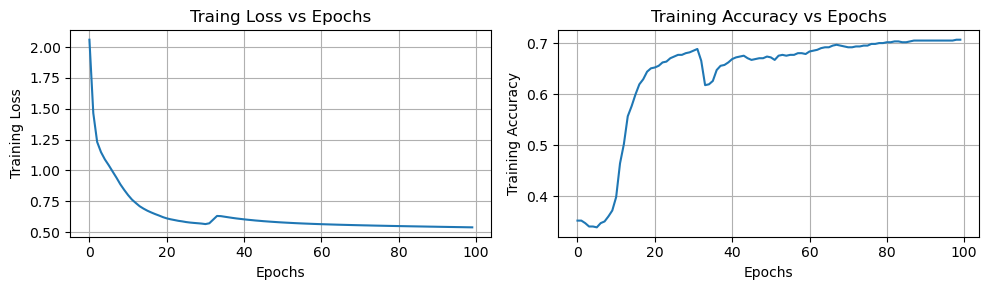

name='1_3-Layer-narrow_Relu_adam_100_32', optimizer_name='adam', epochs=100, loss=0.5382357239723206


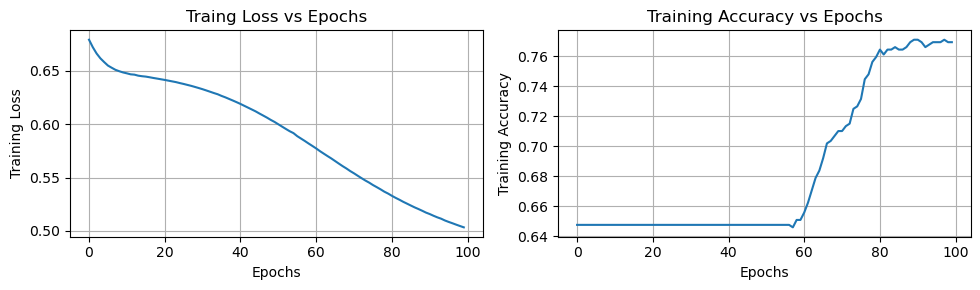

name='2_3-Layer-narrow_Sigmoid_adam_100_32', optimizer_name='adam', epochs=100, loss=0.5033960938453674


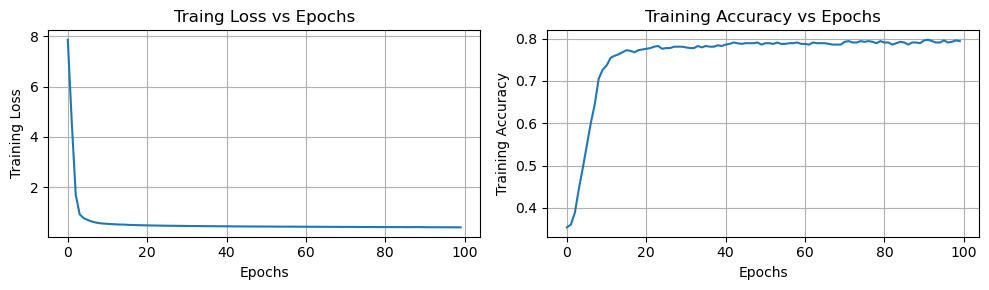

name='3_3-Layer-wide_Relu_adam_100_32', optimizer_name='adam', epochs=100, loss=0.4030040502548218


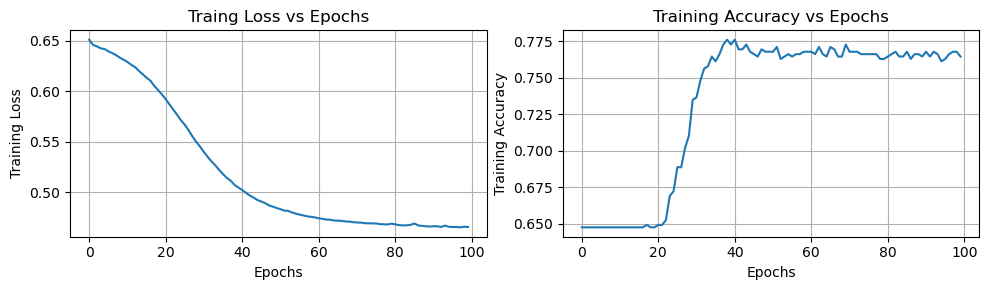

name='4_3-Layer-wide_Sigmoid_adam_100_32', optimizer_name='adam', epochs=100, loss=0.4658350944519043


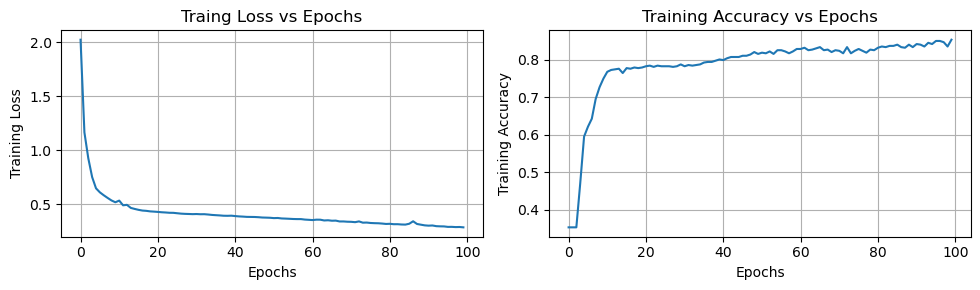

name='5_5-layer-wide-deep_Relu_adam_100_32', optimizer_name='adam', epochs=100, loss=0.2871679663658142


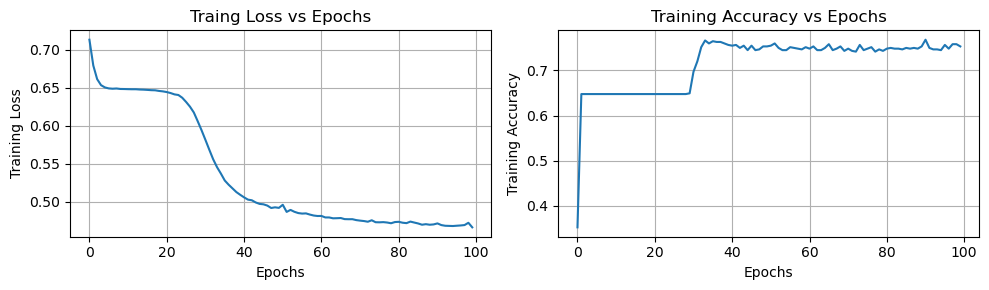

name='6_5-layer-wide-deep_Sigmoid_adam_100_32', optimizer_name='adam', epochs=100, loss=0.46660566329956055


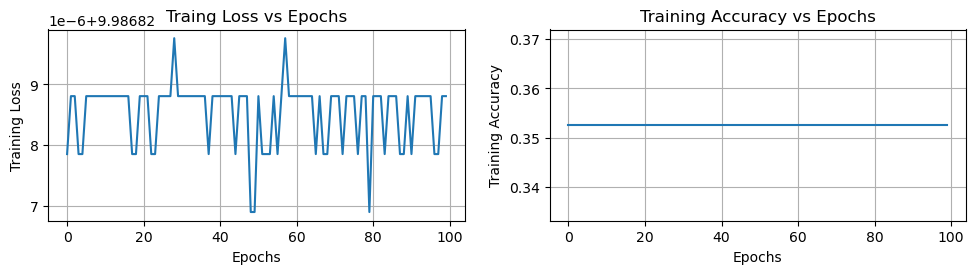

name='1_3-Layer-narrow_Relu_SGD_100_32', optimizer_name='SGD', epochs=100, loss=9.986828804016113


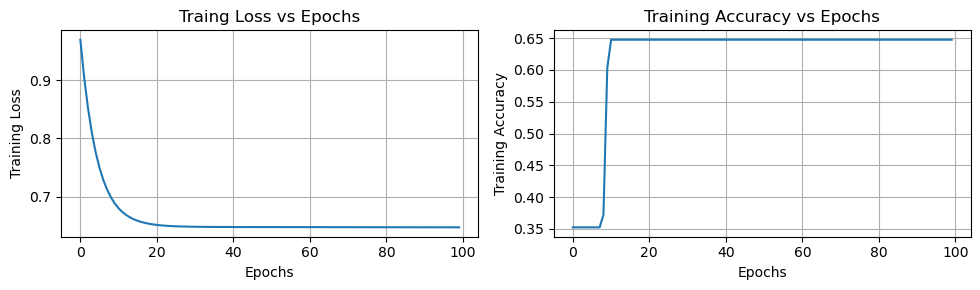

name='2_3-Layer-narrow_Sigmoid_SGD_100_32', optimizer_name='SGD', epochs=100, loss=0.64750075340271


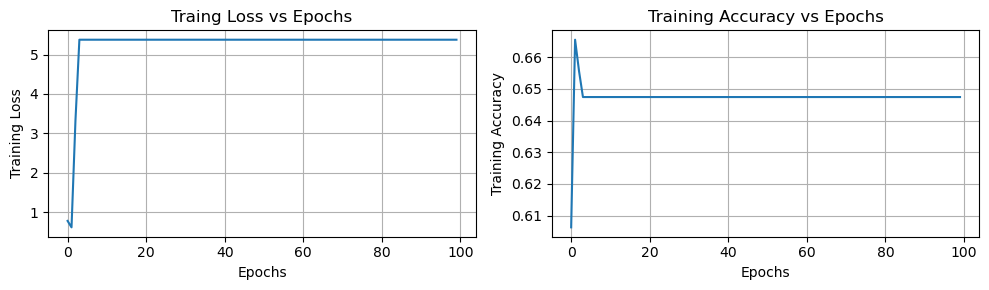

name='3_3-Layer-wide_Relu_SGD_100_32', optimizer_name='SGD', epochs=100, loss=5.37617301940918


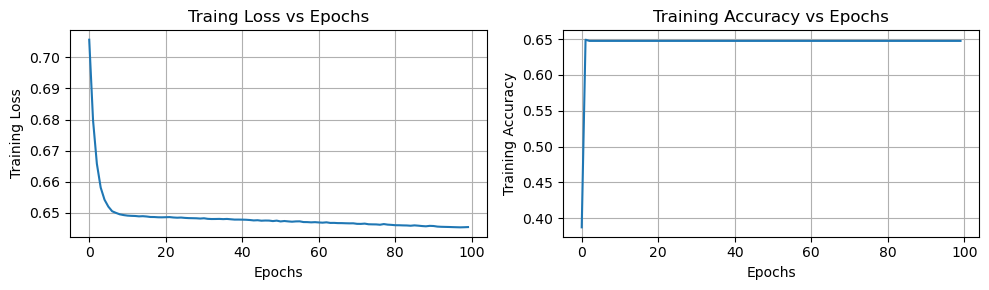

name='4_3-Layer-wide_Sigmoid_SGD_100_32', optimizer_name='SGD', epochs=100, loss=0.6454476118087769


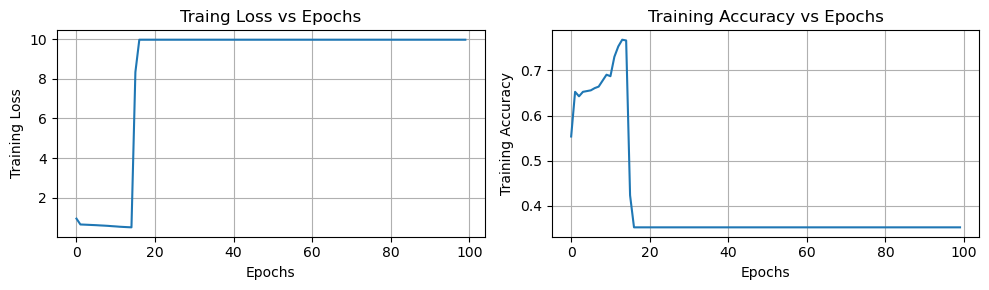

name='5_5-layer-wide-deep_Relu_SGD_100_32', optimizer_name='SGD', epochs=100, loss=9.986828804016113


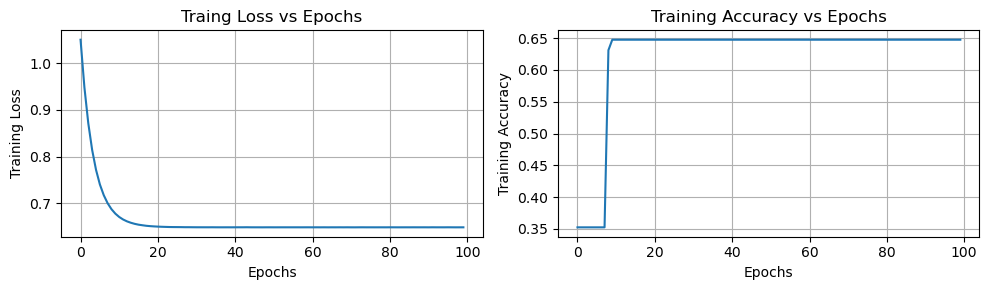

name='6_5-layer-wide-deep_Sigmoid_SGD_100_32', optimizer_name='SGD', epochs=100, loss=0.6490657329559326


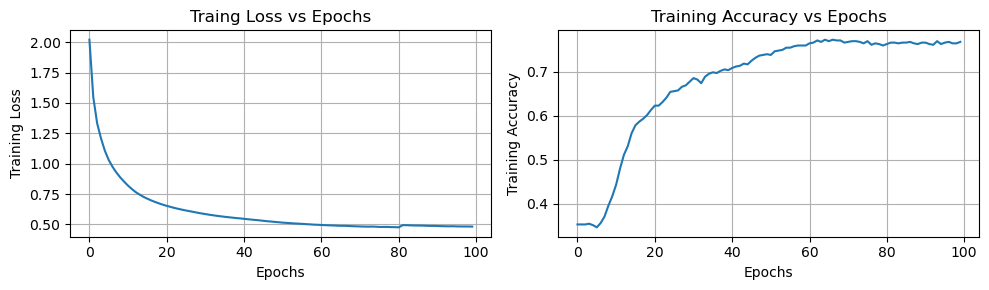

name='1_3-Layer-narrow_Relu_adam_100_64', optimizer_name='adam', epochs=100, loss=0.48151087760925293


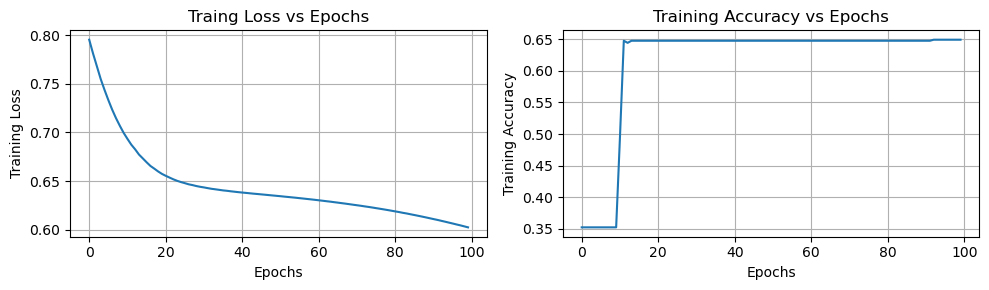

name='2_3-Layer-narrow_Sigmoid_adam_100_64', optimizer_name='adam', epochs=100, loss=0.6024789214134216


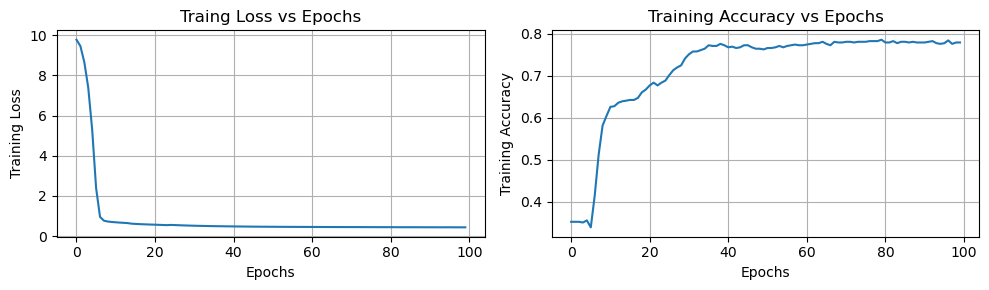

name='3_3-Layer-wide_Relu_adam_100_64', optimizer_name='adam', epochs=100, loss=0.4347342550754547


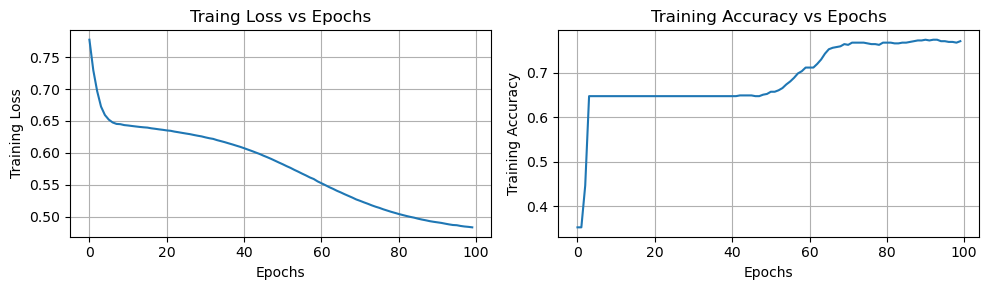

name='4_3-Layer-wide_Sigmoid_adam_100_64', optimizer_name='adam', epochs=100, loss=0.4830387234687805


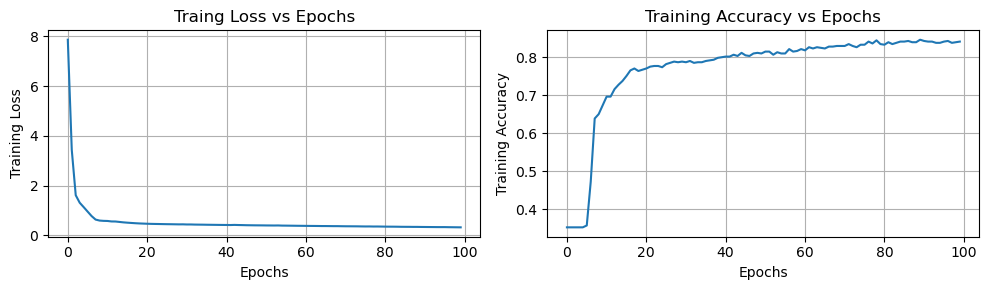

name='5_5-layer-wide-deep_Relu_adam_100_64', optimizer_name='adam', epochs=100, loss=0.3212277591228485


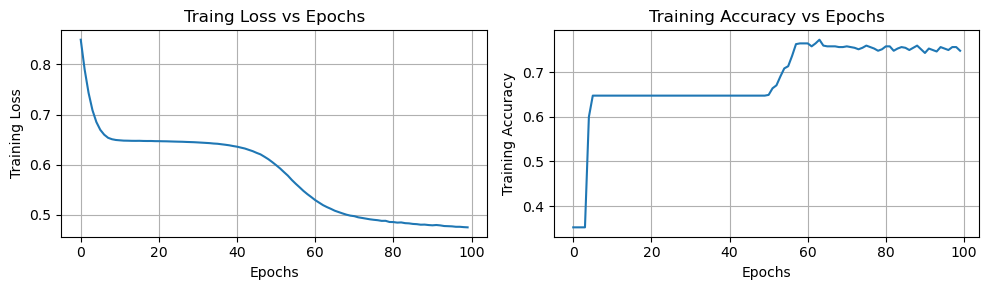

name='6_5-layer-wide-deep_Sigmoid_adam_100_64', optimizer_name='adam', epochs=100, loss=0.47525301575660706


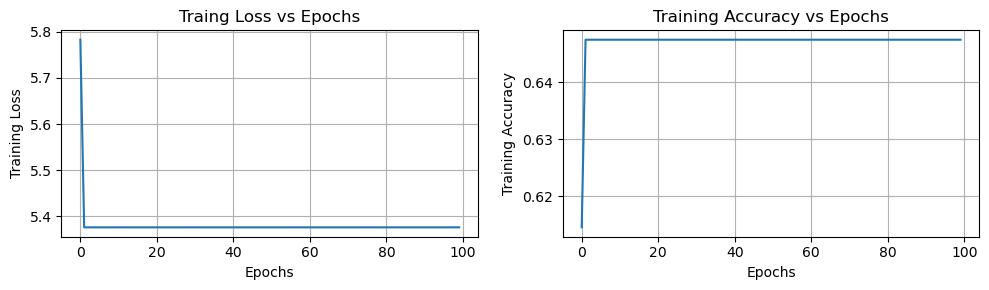

name='1_3-Layer-narrow_Relu_SGD_100_64', optimizer_name='SGD', epochs=100, loss=5.37617301940918


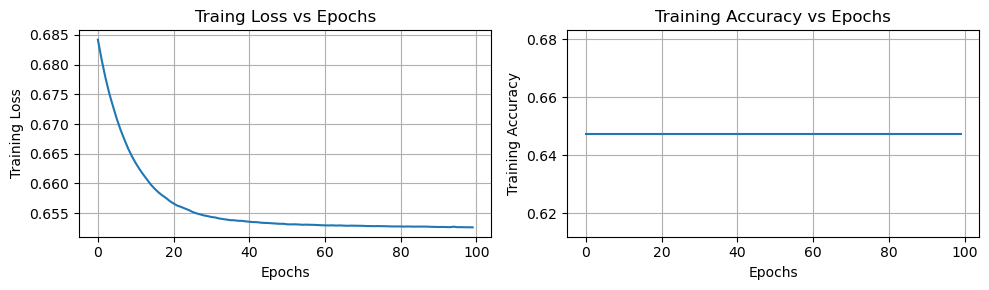

name='2_3-Layer-narrow_Sigmoid_SGD_100_64', optimizer_name='SGD', epochs=100, loss=0.6526099443435669


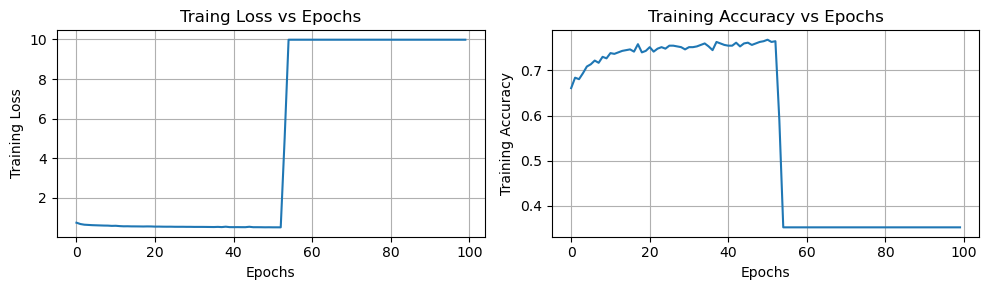

name='3_3-Layer-wide_Relu_SGD_100_64', optimizer_name='SGD', epochs=100, loss=9.98682689666748


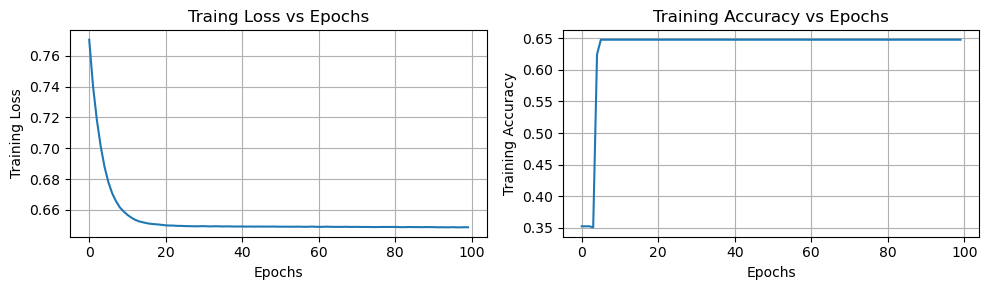

name='4_3-Layer-wide_Sigmoid_SGD_100_64', optimizer_name='SGD', epochs=100, loss=0.6487185955047607


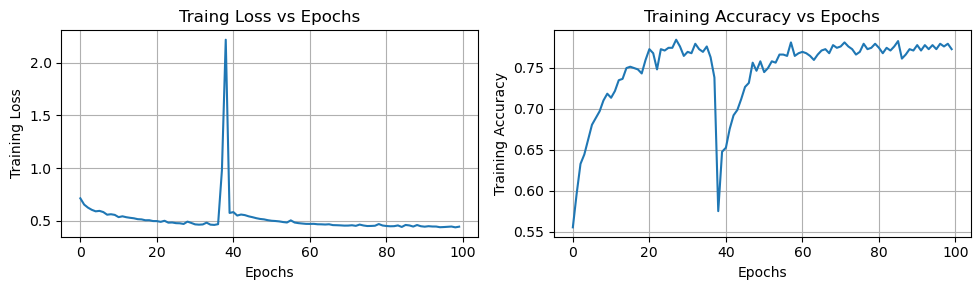

name='5_5-layer-wide-deep_Relu_SGD_100_64', optimizer_name='SGD', epochs=100, loss=0.44425544142723083


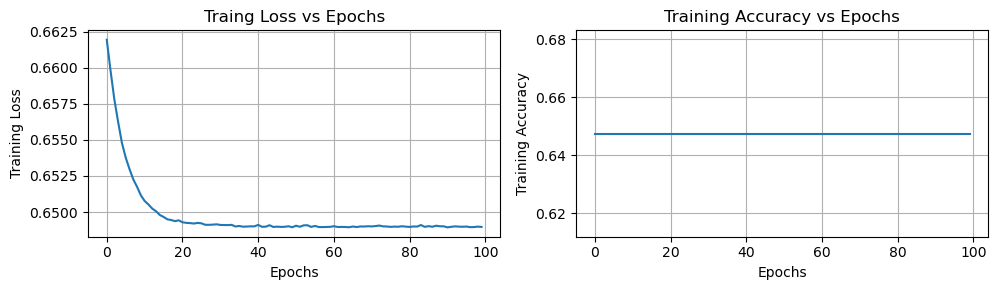

name='6_5-layer-wide-deep_Sigmoid_SGD_100_64', optimizer_name='SGD', epochs=100, loss=0.6489640474319458


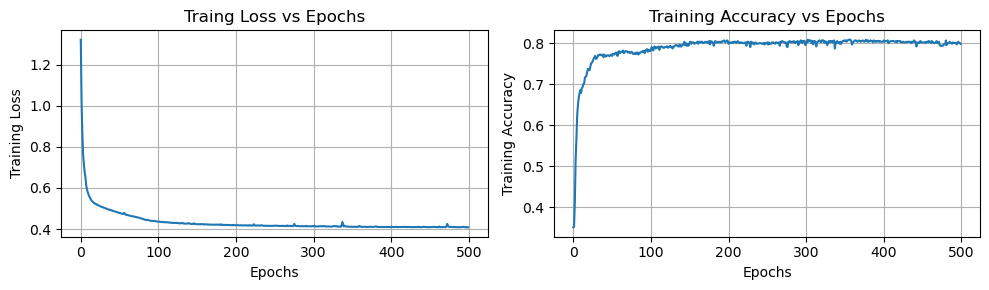

name='1_3-Layer-narrow_Relu_adam_500_32', optimizer_name='adam', epochs=500, loss=0.4084809124469757


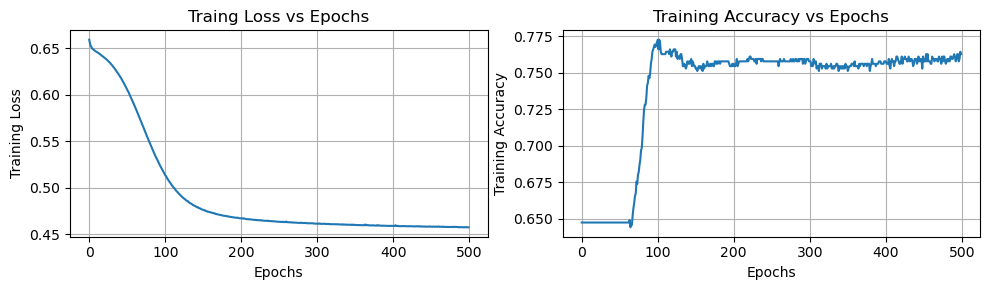

name='2_3-Layer-narrow_Sigmoid_adam_500_32', optimizer_name='adam', epochs=500, loss=0.4576124846935272


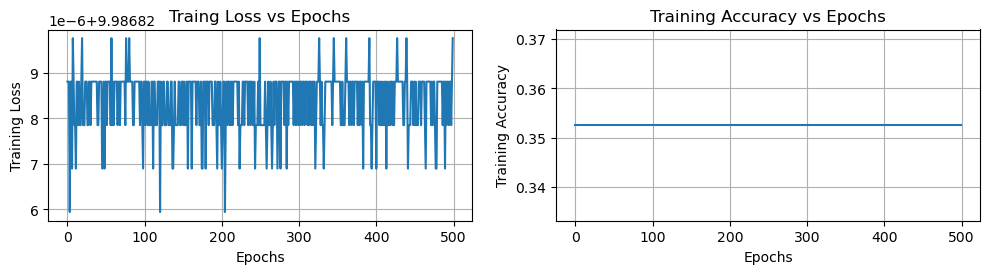

name='3_3-Layer-wide_Relu_adam_500_32', optimizer_name='adam', epochs=500, loss=9.98682975769043


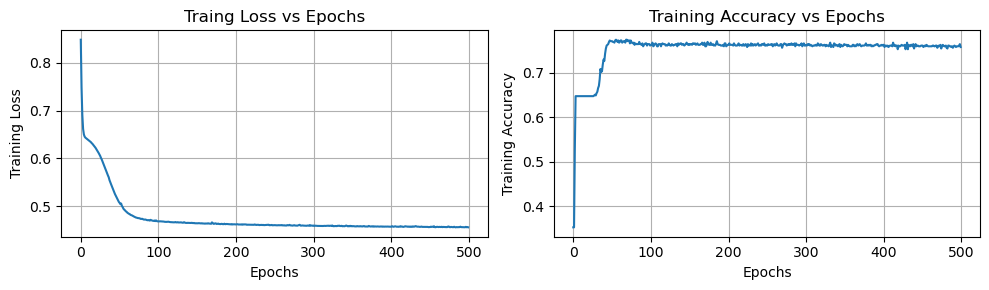

name='4_3-Layer-wide_Sigmoid_adam_500_32', optimizer_name='adam', epochs=500, loss=0.4562365412712097


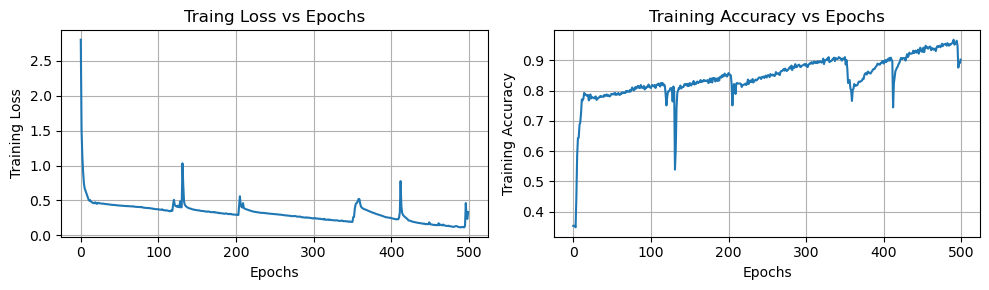

name='5_5-layer-wide-deep_Relu_adam_500_32', optimizer_name='adam', epochs=500, loss=0.33519455790519714


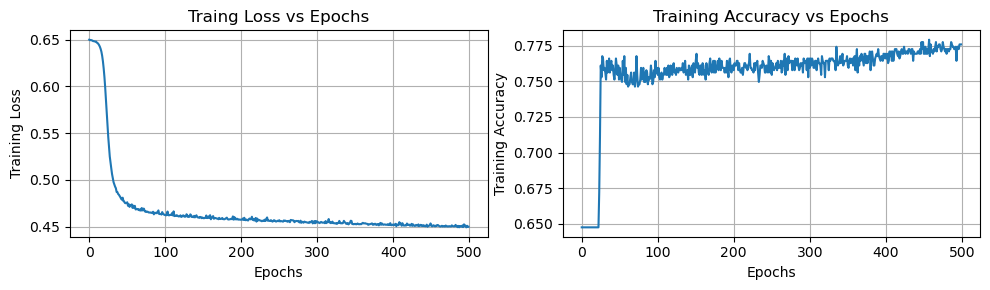

name='6_5-layer-wide-deep_Sigmoid_adam_500_32', optimizer_name='adam', epochs=500, loss=0.44993889331817627


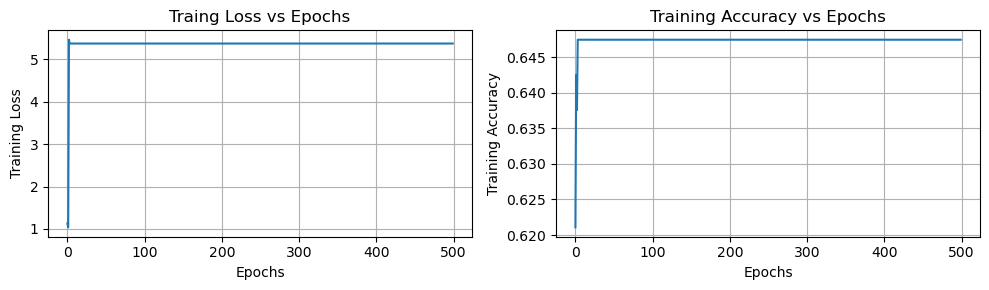

name='1_3-Layer-narrow_Relu_SGD_500_32', optimizer_name='SGD', epochs=500, loss=5.376173496246338


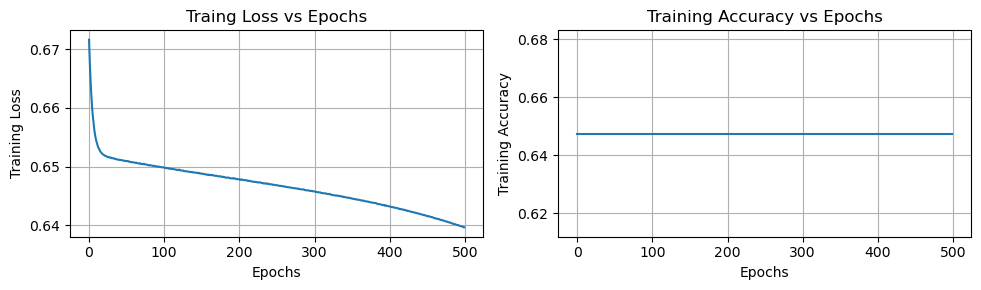

name='2_3-Layer-narrow_Sigmoid_SGD_500_32', optimizer_name='SGD', epochs=500, loss=0.6396651864051819


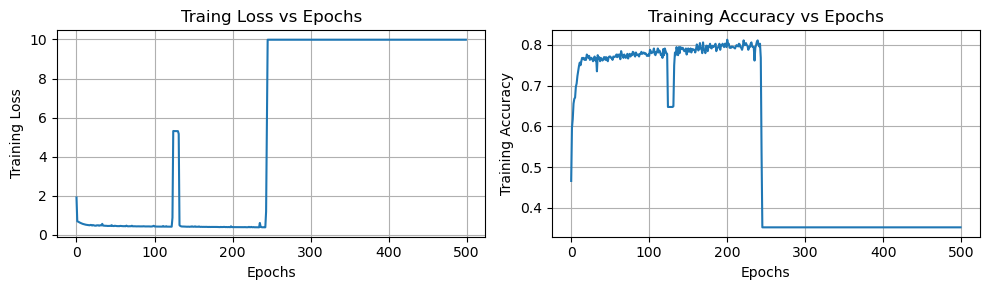

name='3_3-Layer-wide_Relu_SGD_500_32', optimizer_name='SGD', epochs=500, loss=9.986828804016113


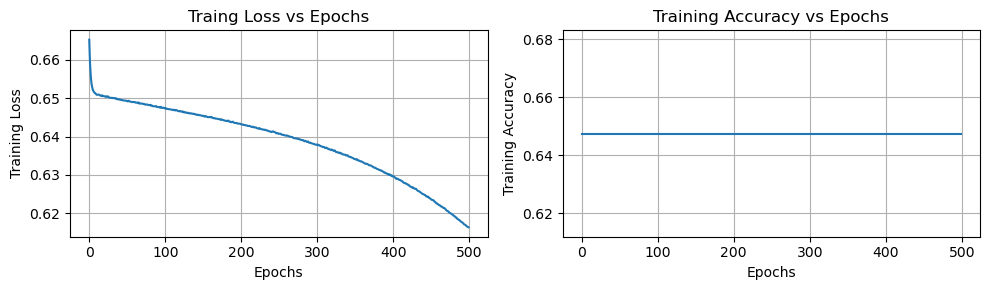

name='4_3-Layer-wide_Sigmoid_SGD_500_32', optimizer_name='SGD', epochs=500, loss=0.6163460612297058


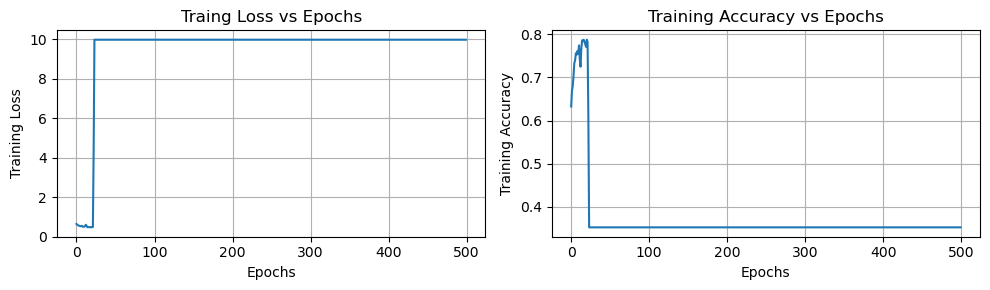

name='5_5-layer-wide-deep_Relu_SGD_500_32', optimizer_name='SGD', epochs=500, loss=9.986828804016113


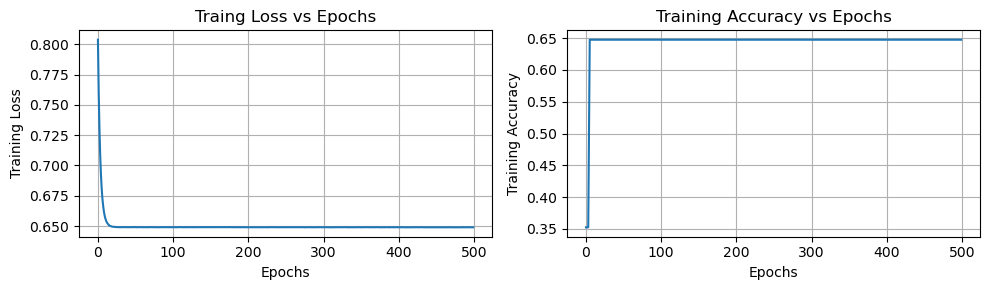

name='6_5-layer-wide-deep_Sigmoid_SGD_500_32', optimizer_name='SGD', epochs=500, loss=0.6489843130111694


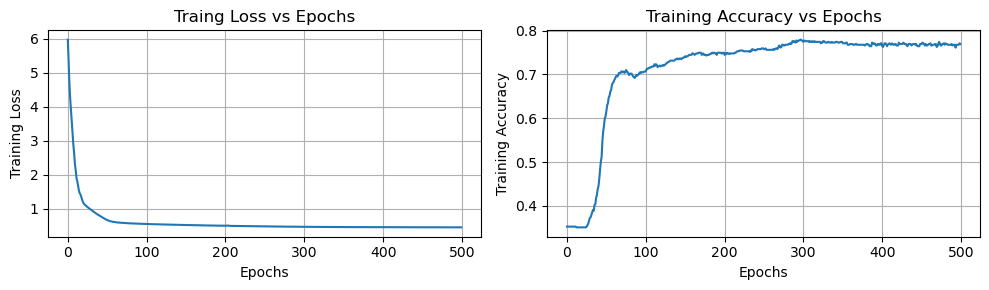

name='1_3-Layer-narrow_Relu_adam_500_64', optimizer_name='adam', epochs=500, loss=0.454512357711792


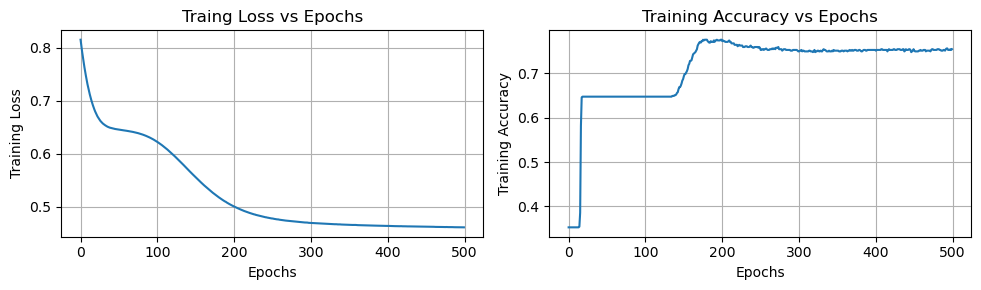

name='2_3-Layer-narrow_Sigmoid_adam_500_64', optimizer_name='adam', epochs=500, loss=0.4607451856136322


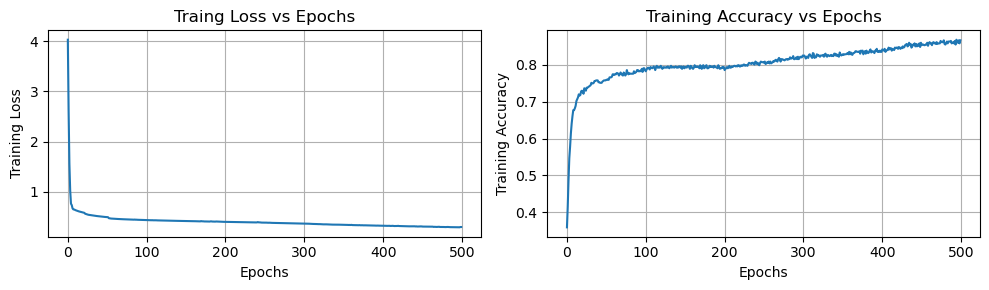

name='3_3-Layer-wide_Relu_adam_500_64', optimizer_name='adam', epochs=500, loss=0.29779842495918274


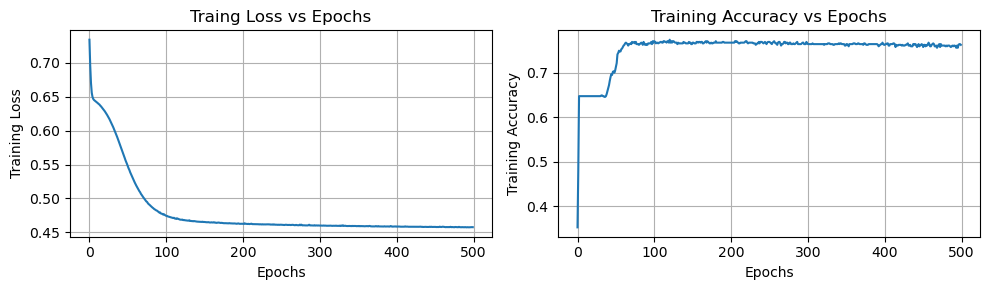

name='4_3-Layer-wide_Sigmoid_adam_500_64', optimizer_name='adam', epochs=500, loss=0.45754149556159973


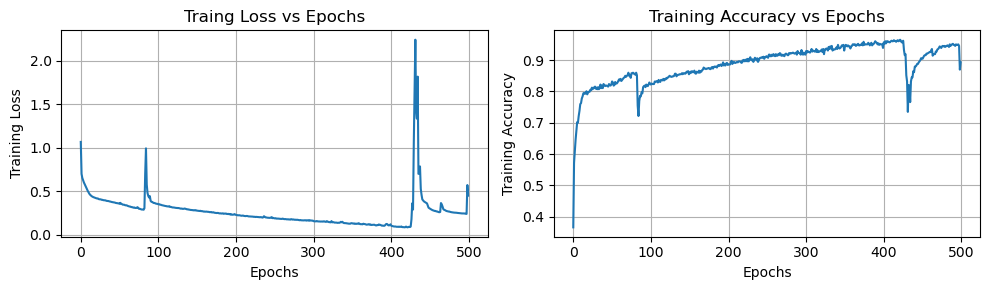

name='5_5-layer-wide-deep_Relu_adam_500_64', optimizer_name='adam', epochs=500, loss=0.45027676224708557


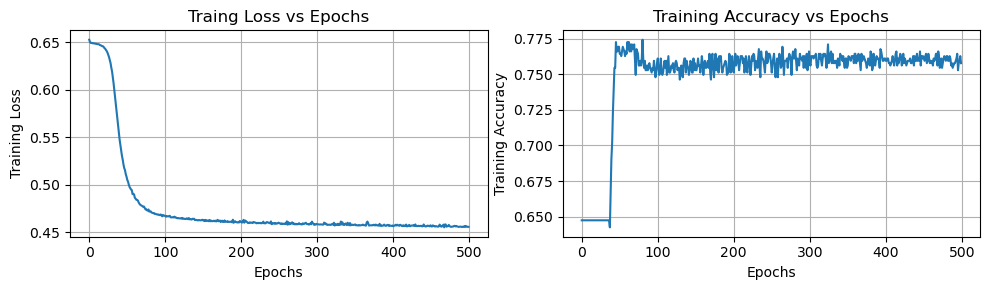

name='6_5-layer-wide-deep_Sigmoid_adam_500_64', optimizer_name='adam', epochs=500, loss=0.4558340907096863


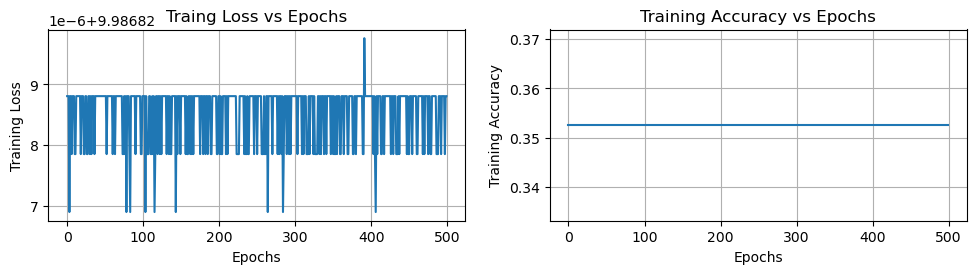

name='1_3-Layer-narrow_Relu_SGD_500_64', optimizer_name='SGD', epochs=500, loss=9.986828804016113


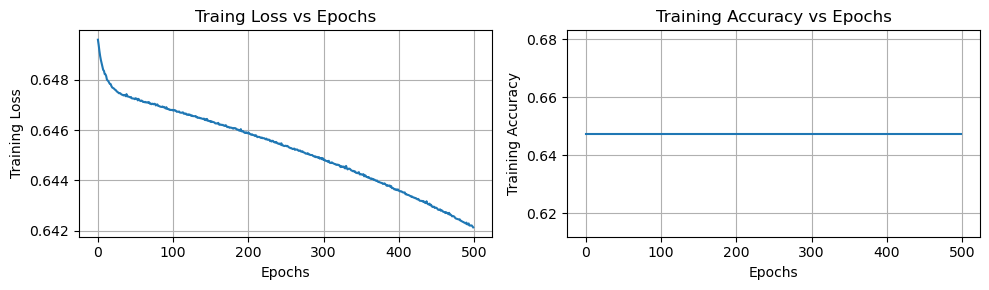

name='2_3-Layer-narrow_Sigmoid_SGD_500_64', optimizer_name='SGD', epochs=500, loss=0.642134964466095


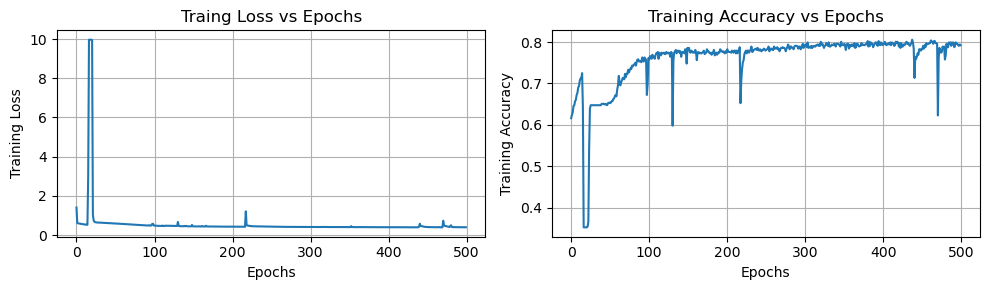

name='3_3-Layer-wide_Relu_SGD_500_64', optimizer_name='SGD', epochs=500, loss=0.4002845883369446


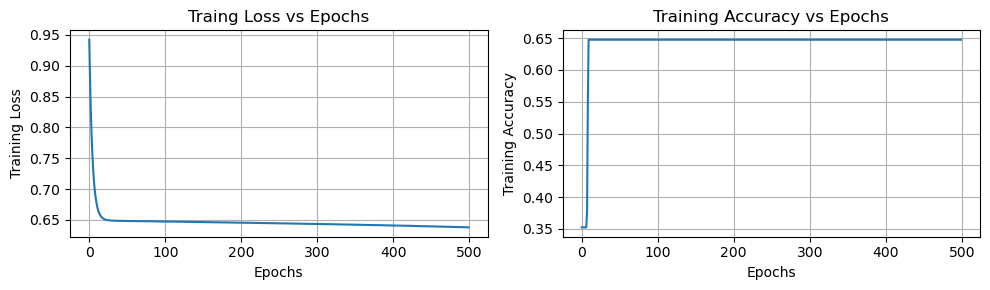

name='4_3-Layer-wide_Sigmoid_SGD_500_64', optimizer_name='SGD', epochs=500, loss=0.6380241513252258


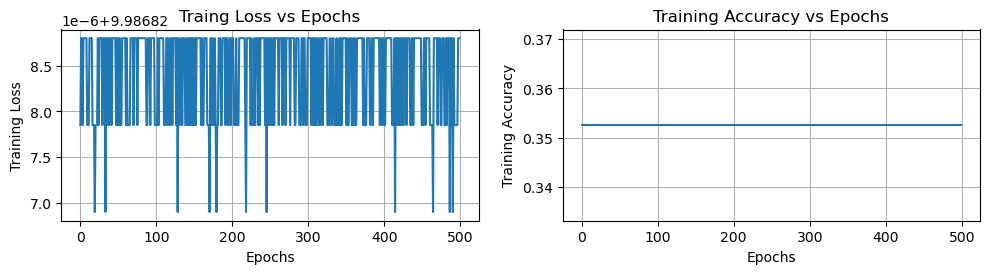

name='5_5-layer-wide-deep_Relu_SGD_500_64', optimizer_name='SGD', epochs=500, loss=9.986828804016113


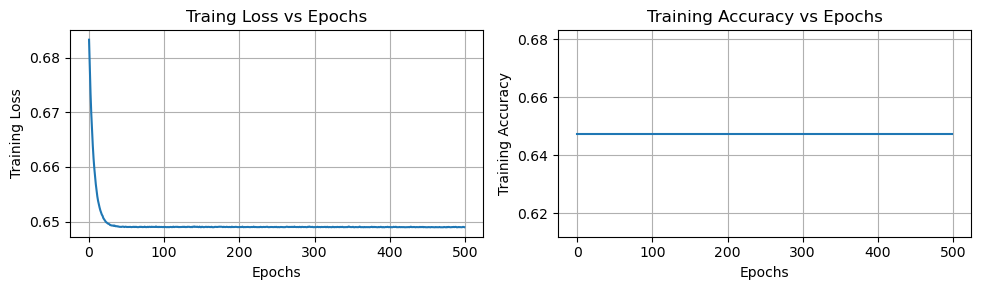

name='6_5-layer-wide-deep_Sigmoid_SGD_500_64', optimizer_name='SGD', epochs=500, loss=0.6489937901496887


In [19]:
"""
    Training many neural netowrk created and then changing the hyper-parameters to see how model is performing
"""

epochs_list = [100, 500]

batch_sizes = [32, 64]

optimizers = ['adam', 'SGD']

models_with_param = {}

    
for epochs in epochs_list:

    for batch_size in batch_sizes:

        for optimizer_name in optimizers:

            tensorflow_models, model_names = load_different_tensorflow_model(X_train.shape[1])

            for i, (tensorflow_model) in enumerate(tensorflow_models):
                
                trained_model, loss, accuracy = train_tensorflow(X_train, 
                                                                 y_train, 
                                                                 tensorflow_model, 
                                                                 loss = tf.keras.losses.BinaryCrossentropy(),
                                                                 optimizer = optimizer_name,
                                                                 metrics = ['accuracy'],
                                                                 epochs=epochs,
                                                                 batch_size=batch_size,
                                                                 plots=True
                                                                 )
                name = f"{i+1}_{model_names[i]}_{optimizer_name}_{epochs}_{batch_size}"
                print(f"{name=}, {optimizer_name=}, {epochs=}, loss={loss[-1]}")
                models_with_param[name] = trained_model 

## Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why

In [20]:
result = {"name": [], "model": [], "activation_fun": [], "optimizer" : [], "epochs": [], 
          "batch_size": [], "train_accuracy": [], "test_accuracy": []}

best_accuracy, best_model = 0.0, ""

for model_name in sorted(models_with_param.keys()):
    
    tensorflow_model = models_with_param[model_name]
    model_params = model_name.split("_")

    result["name"].append(model_params[1])
    result["activation_fun"].append(model_params[2])
    result["optimizer"].append(model_params[3])
    result["epochs"].append(model_params[4])
    result["batch_size"].append(model_params[5])
    
    summary_str = ""
    for i, layer in enumerate(tensorflow_model.layers):
        layer_summary = f"Layer {i}: Size={layer.output_shape[1]}, "
        summary_str += layer_summary
    result["model"].append(summary_str)

    print(f"\n\tEavluating Model = {model_name}")
    y_train_pred = predict_tf(tensorflow_model, X_train,0)
    train_accuracy = calculate_accuracy_tf(y_train, y_train_pred)
    
    y_test_pred = predict_tf(tensorflow_model, X_test)
    test_accuracy = calculate_accuracy_tf(y_test, y_test_pred)

    result["train_accuracy"].append(train_accuracy)
    result["test_accuracy"].append(test_accuracy)
    print(f"{test_accuracy=}")

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model_name



	Eavluating Model = 1_3-Layer-narrow_Relu_SGD_100_32
raw scores =  [0. 0. 0. 0. 0.]
predictions =  [0 0 0 0 0]
test_accuracy=32.23684210526316

	Eavluating Model = 1_3-Layer-narrow_Relu_SGD_100_64
raw scores =  [3.0818067 3.0680285 3.0423563 3.0264964 2.9472127]
predictions =  [1 1 1 1 1]
test_accuracy=67.76315789473685

	Eavluating Model = 1_3-Layer-narrow_Relu_SGD_500_32
raw scores =  [1.9820479 1.9734141 1.978914  1.9697067 1.9320524]
predictions =  [1 1 1 1 1]
test_accuracy=67.76315789473685

	Eavluating Model = 1_3-Layer-narrow_Relu_SGD_500_64
raw scores =  [0. 0. 0. 0. 0.]
predictions =  [0 0 0 0 0]
test_accuracy=32.23684210526316

	Eavluating Model = 1_3-Layer-narrow_Relu_adam_100_32
raw scores =  [0.620045   0.60795003 0.7888546  0.47222236 1.048294  ]
predictions =  [1 1 1 0 1]
test_accuracy=67.76315789473685

	Eavluating Model = 1_3-Layer-narrow_Relu_adam_100_64
raw scores =  [0.74761194 0.5425262  0.34966612 0.62236094 1.1483345 ]
predictions =  [1 1 0 1 1]
test_accuracy=73

raw scores =  [0.8545078  0.5127473  0.34366822 0.7888945  0.9878538 ]
predictions =  [1 1 0 1 1]
test_accuracy=75.0


In [21]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.expand_frame_repr', False)

result_df = pd.DataFrame(result)
result_df.head(100)   

name                                                                                     model activation_fun optimizer epochs batch_size  train_accuracy  test_accuracy
0      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,            Relu       SGD    100         32       35.255354      32.236842
1      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,            Relu       SGD    100         64       64.744646      67.763158
2      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,            Relu       SGD    500         32       64.744646      67.763158
3      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,            Relu       SGD    500         64       35.255354      32.236842
4      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,            Relu      adam    100         32       70.675453      67.763158
5      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,            Relu      adam    100         64       76.771005      73.684211
6      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,            Relu      adam    500         32       79.901153      71.710526
7      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,            Relu      adam    500         64       76.771005      74.342105
8      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,         Sigmoid       SGD    100         32       64.744646      67.763158
9      3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,         Sigmoid       SGD    100         64       64.744646      67.763158
10     3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,         Sigmoid       SGD    500         32       64.744646      67.763158
11     3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,         Sigmoid       SGD    500         64       64.744646      67.763158
12     3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,         Sigmoid      adam    100         32       76.935750      75.657895
13     3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,         Sigmoid      adam    100         64       64.909390      67.763158
14     3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,         Sigmoid      adam    500         32       76.276771      76.315789
15     3-Layer-narrow                                       Layer 0: Size=4, Layer 1: Size=4, Layer 2: Size=1,         Sigmoid      adam    500         64       75.453048      75.000000
16       3-Layer-wide                                     Layer 0: Size=16, Layer 1: Size=16, Layer 2: Size=1,            Relu       SGD    100         32       64.744646      67.763158
17       3-Layer-wide                                     Layer 0: Size=16, Layer 1: Size=16, Layer 2: Size=1,            Relu       SGD    100         64       35.255354      32.236842
18       3-Layer-wide                                     Layer 0: Size=16, Layer 1: Size=16, Layer 2: Size=1,            Relu       SGD    500         32       35.255354      32.236842
19       3-Layer-wide                                     Layer 0: Size=16, Layer 1: Size=16, Layer 2: Size=1,            Relu       SGD    500         64       79.901153      72.368421
20       3-Layer-wide                                     Layer 0: Size=16, Layer 1: Size=16, Layer 2: Size=1, 

In [22]:
print(f"{best_accuracy=}")
print("\n\nbest model is =")
print(models_with_param[best_model])

best_accuracy=76.31578947368422


best model is =


### Explaination

    - Its clear that as the Model is getting complex the training accuracy is getting higher.
    
    - As the model getting mode complex test accuracy is getting lower.
    
    - Higher train accuracy and lower test accuracy point to overfitting of the model becuase.
    
    - From the above Result Data Frame its clear that network was getting Complex the training accuracy also degraded and the test accuracy.
    
    - The data size was also small, as the neural networks perform better with large data.
    
